In [7]:
import pandas as pd

file_path = '학력_임금.csv'
data = pd.read_csv(file_path, encoding='cp949')


# 컬럼 이름을 이해하기 쉬운 이름으로 변경
data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '평균근속년수', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액',
                '월급여', '정액급여', '근로자수']

# 'Monthly_Total_Income' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')

# 'Monthly_Total_Income' 컬럼에 결측값이 있는 행 제거
data = data.dropna(subset=['월임금총액'])

# 'Education'별로 그룹화하여 평균 월임금 계산
education_income = data.groupby('학력별')['월임금총액'].mean().reset_index()

# 결과 출력
print(education_income)

    학력별        월임금총액
0    고졸  2898.666667
1  대졸이상  3514.500000
2  전문대졸  3059.500000


In [8]:
# 천 단위로 변환하는 함수
def format_currency(value):
    value_in_thousands = value / 10
    return f"{value_in_thousands:.0f}만 {int((value % 10000) / 1000)}천원"

# 월임금총액을 천 단위 한국 원화 형식으로 변환
education_income['월임금총액'] = education_income['월임금총액'].apply(format_currency)

print(education_income)

    학력별     월임금총액
0    고졸  290만 2천원
1  대졸이상  351만 3천원
2  전문대졸  306만 3천원


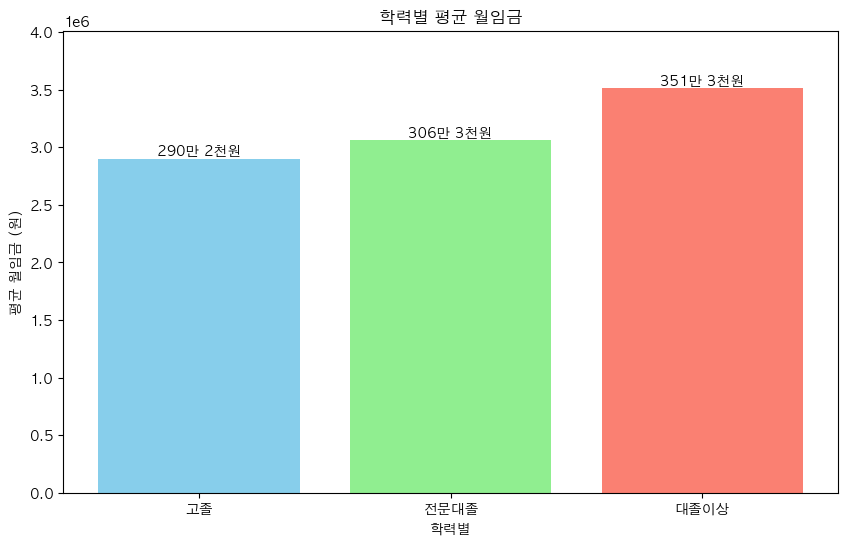

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

education = ['고졸', '전문대졸', '대졸이상']
income = [2902000, 3063000, 3513000]
formatted_income = ['290만 2천원', '306만 3천원', '351만 3천원']


plt.figure(figsize=(10, 6))
bars = plt.bar(education, income, color=['skyblue', 'lightgreen', 'salmon'])

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (원)')
plt.title('학력별 평균 월임금')
plt.ylim(0, max(income) + 500000)

# 각 막대 위에 천 단위로 변환된 월임금 표시
for bar, label in zip(bars, formatted_income):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.show()